# Домашнее задание №1. Бусько Полина.

## Поставновка задачи.

Будем решать задачу классификации. Для этого выберем предсказание оценок пользователей на основе других данных. Оценки пользователей можно разделить на три класса: низкий, средний, высокий.

In [1]:
import pandas as pd

In [2]:
file_path = 'all_games.csv'
data = pd.read_csv(file_path)

Первые и последние значения из таблицы данных:

In [3]:
data

,name,platform,release_date,summary,meta_score,user_review
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,"November 23, 1998","As a young boy, Link is tricked by Ganondorf, ...",99,9.1
1,Tony Hawk's Pro Skater 2,PlayStation,"September 20, 2000",As most major publishers' development efforts ...,98,7.4
2,Grand Theft Auto IV,PlayStation 3,"April 29, 2008",[Metacritic's 2008 PS3 Game of the Year; Also ...,98,7.7
3,SoulCalibur,Dreamcast,"September 8, 1999","This is a tale of souls and swords, transcendi...",98,8.4
4,Grand Theft Auto IV,Xbox 360,"April 29, 2008",[Metacritic's 2008 Xbox 360 Game of the Year; ...,98,7.9
...,...,...,...,...,...,...
18795,Fast & Furious: Showdown,Xbox 360,"May 21, 2013",Fast & Furious: Showdown takes some of the fra...,22,1.3
18796,Drake of the 99 Dragons,Xbox,"November 3, 2003",Drake is out for revenge in a supernatural Hon...,22,1.7
18797,Afro Samurai 2: Revenge of Kuma Volume One,PlayStation 4,"September 22, 2015","Head out on a journey of redemption, driven by...",21,2.9
18798,Infestation: Survivor Stories (The War Z),PC,"October 15, 2012","(Formerly known as ""The War Z"") It has been 5 ...",20,1.7


Выведем информацию о датасете:

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18800 entries, 0 to 18799
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          18800 non-null  object
 1   platform      18800 non-null  object
 2   release_date  18800 non-null  object
 3   summary       18686 non-null  object
 4   meta_score    18800 non-null  int64 
 5   user_review   18800 non-null  object
dtypes: int64(1), object(5)
memory usage: 881.4+ KB


Отсюда видно, что имеются следующие признаки:


* name - название видеоигры
* platform - платформа, на которой он вышла
* release_date - дата релиза
* summary - описание
* meta_score - оценка сообщества
* user_review - пользовательский обзор

Для категориальных признаков изменим тип на тип category:

In [5]:
data['name'] = data['name'].astype('category')
data['release_date'] = data['release_date'].astype('category')

Вычислим основные статистические характеристики:

In [6]:
print(data.describe())
print(data.mean())
print(data.std())
correlation_matrix = data.corr()
print(correlation_matrix)

         meta_score
count  18800.000000
mean      70.648883
std       12.225006
min       20.000000
25%       64.000000
50%       72.000000
75%       80.000000
max       99.000000
meta_score    70.648883
dtype: float64
meta_score    12.225006
dtype: float64
            meta_score
meta_score         1.0


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

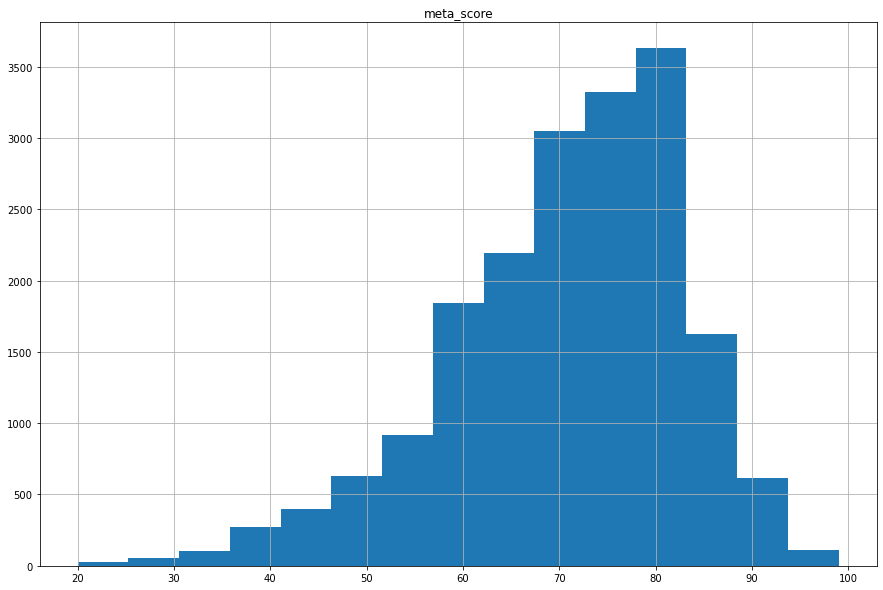

In [8]:
data.hist(bins=15, figsize=(15, 10))
plt.show()

Обработка пропущенных значений.

In [9]:
missing_values = data.isnull().sum()
print("Пропущенные значения в каждом столбце:")
print(missing_values)

all_missing = missing_values.sum()
print(f"\nОбщее количество пропуcков: {all_missing}")


Пропущенные значения в каждом столбце:
name              0
platform          0
release_date      0
summary         114
meta_score        0
user_review       0
dtype: int64

Общее количество пропуcков: 114


In [10]:
data = data.dropna()

In [11]:
print("Пропущенные значения после обработки:")
print(data.isnull().sum())

Пропущенные значения после обработки:
name            0
platform        0
release_date    0
summary         0
meta_score      0
user_review     0
dtype: int64


Обработаем категориальные признаки

Применим метод бинаризации к категориальным признакам

In [12]:
data_nonbinary = pd.get_dummies(data[['name','release_date']])
print(data_nonbinary.columns)

Index(['name_#DRIVE', 'name_#IDARB', 'name_#KILLALLZOMBIES',
       'name_'Splosion Man', 'name_.detuned', 'name_.hack//G.U. Last Recode',
       'name_.hack//G.U. vol. 1//Rebirth',
       'name_.hack//G.U. vol. 2//Reminisce',
       'name_.hack//G.U. vol. 3//Redemption', 'name_.hack//Infection Part 1',
       ...
       'release_date_September 9, 2004', 'release_date_September 9, 2008',
       'release_date_September 9, 2009', 'release_date_September 9, 2011',
       'release_date_September 9, 2014', 'release_date_September 9, 2015',
       'release_date_September 9, 2016', 'release_date_September 9, 2019',
       'release_date_September 9, 2020', 'release_date_September 9, 2021'],
      dtype='object', length=16787)


In [13]:
data = pd.concat((data, data_nonbinary), axis=1).drop(['name', 'release_date'], axis=1)

Нормализацию данных можно не делать, так как числовой признак meta_score усреднены по каждой игре, и заключен в извстный интервал.

Обработаем текстовые признаки:

In [14]:
data['summary'].dtype

dtype('O')

Приводим текст к нижнему регистру:

In [15]:
def lower(text):
    return text.lower()

data['Text'] = data['summary'].apply(lambda x:lower(x))

Убираем пунктуацию и лишние пробелы

In [16]:
import re
def punct_remove(text):
    return re.sub(r'[^\w\s]', '', text)

def remove_space(text):
    return re.sub(r"\s+"," ",text).strip()

data['Text'] = data['Text'].apply(lambda x:punct_remove(x))
data['Text'] = data['Text'].apply(lambda x:remove_space(x))

Выполняем стемминг - находим основы слова для заданного исходного слова:

In [17]:
from nltk.stem import PorterStemmer

def stemming(text):
    return ' '.join([PorterStemmer().stem(w) for w in text.split()])

data['Text'] = data['Text'].apply(lambda x:stemming(x))

### Разбиваем данные на обучающую и тестовую выборки, запускаем классификатор

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

In [19]:
data['user_review'] = pd.to_numeric(data['user_review'], errors='coerce')
data = data.dropna(subset=['user_review'])

data['review_class'] = pd.cut(data['user_review'], bins=[0, 5, 7.5, 10], labels=[0, 1, 2])

le = LabelEncoder()
data['platform_encoded'] = le.fit_transform(data['platform'])


X = data[['meta_score', 'platform_encoded']]
y = data['review_class'].astype(int)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

In [21]:
print(classification_report(y_test, y_pred, target_names=['low', 'middle', 'hight']))

              precision    recall  f1-score   support

         low       0.41      0.22      0.29       536
      middle       0.61      0.70      0.65      2590
       hight       0.65      0.60      0.63      2077

    accuracy                           0.61      5203
   macro avg       0.55      0.51      0.52      5203
weighted avg       0.60      0.61      0.60      5203



In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

k_arr = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 16, 18, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': k_arr}, cv=4)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors

In [23]:
print(best_cv_err, best_n_neighbors)

0.33712255068585684 45


Ошибка на обучающей и тестовой выборках:

In [24]:
import numpy as np

knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.3261657604218158 0.3478762252546608


Изменим количество ближайших соседий:

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

knn = KNeighborsClassifier(n_neighbors=45)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['low', 'middle', 'hight']))

              precision    recall  f1-score   support

         low       0.63      0.17      0.27       536
      middle       0.63      0.75      0.69      2590
       hight       0.68      0.65      0.67      2077

    accuracy                           0.65      5203
   macro avg       0.65      0.53      0.54      5203
weighted avg       0.65      0.65      0.64      5203



## Итог

В ходе работы были выполнены задачи:

Описана задача
Прочитаны данные
Визуализированы данные и вычислены основные характеристики
Обработаны пропущенные значения
Обработаны категориальные признаки
Обработаны текстовые признаки
Запущен классификатор ближайших соседей для разных количеств
Вычислена ошибка на обучающей и тестовой выборках.

По представленным данным видно, что модель лучше классифицирует средние и высокие оценки (в особенности средние), но хуже справляется с низкими. Это может быть связано с дисбалансом в классах. 